### 1. Présentation de la base de données

La base de données **scoring.sav** contient des informations issues d'une étude menée par une banque pour évaluer la **solvabilité** de ses clients.  
Chaque observation représente un client, caractérisé par un ensemble de **variables explicatives** (sociodémographiques, financières, etc.) ainsi qu'une variable cible indiquant s’il est **solvable** ou **non**.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pyreadstat
import seaborn as sns

### 2. Préparation des données 

In [4]:
# Lire le fichier scoring.sav
df, meta = pyreadstat.read_sav("scoring.sav")

# Afficher les premières lignes
df.head(10)


,Age,Marital,Expenses,Income,Amount,Price,Statut1
0,30.0,2.0,73.0,129.0,800.0,846.0,0.0
1,58.0,3.0,48.0,131.0,1000.0,1658.0,0.0
2,46.0,2.0,90.0,200.0,2000.0,2985.0,1.0
3,24.0,1.0,63.0,182.0,900.0,1325.0,0.0
4,26.0,1.0,46.0,107.0,310.0,910.0,0.0
5,36.0,2.0,75.0,214.0,650.0,1645.0,0.0
6,44.0,2.0,75.0,125.0,1600.0,1800.0,0.0
7,27.0,1.0,35.0,80.0,200.0,1093.0,0.0
8,32.0,2.0,90.0,107.0,1200.0,1957.0,0.0
9,41.0,2.0,90.0,80.0,1200.0,1468.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1015 non-null   float64
 1   Marital   1015 non-null   float64
 2   Expenses  1015 non-null   float64
 3   Income    1015 non-null   float64
 4   Amount    1015 non-null   float64
 5   Price     1015 non-null   float64
 6   Statut1   1015 non-null   float64
dtypes: float64(7)
memory usage: 55.6 KB


In [6]:
# Affiche les noms de colonnes SPSS
print(meta.column_names)

# Affiche les labels associés aux colonnes
print(meta.column_labels)

# Affiche les labels pour les valeurs (par ex. pour des variables catégorielles codées)
print(meta.value_labels)


['Age', 'Marital', 'Expenses', 'Income', 'Amount', 'Price', 'Statut1']
["client's age", 'marital status', 'amount of expenses', 'amount of income', 'amount requested of loan', 'price of good', 'credit status']
{'labels0': {0.0: 'Yes', 1.0: 'No'}}


In [7]:
# Conversion en entiers d'abord
df['Marital'] = df['Marital'].astype(int)
df['Statut1'] = df['Statut1'].astype(int)

# Puis conversion en variables catégorielles
df['Marital'] = df['Marital'].astype('category')
df['Statut1'] = df['Statut1'].astype('category')

# Vérification des types et des valeurs
print(df[['Marital', 'Statut1']].dtypes)
print("\nValeurs uniques de Martial:", df['Marital'].unique())
print("Valeurs uniques de Statut1:", df['Statut1'].unique())

Marital    category
Statut1    category
dtype: object

Valeurs uniques de Martial: [2, 3, 1, 4, 5]
Categories (5, int32): [1, 2, 3, 4, 5]
Valeurs uniques de Statut1: [0, 1]
Categories (2, int32): [0, 1]


In [8]:
df.describe(include=["object", "category"])


,Marital,Statut1
count,1015,1015
unique,5,2
top,2,0
freq,775,742


In [9]:
df.head()

,Age,Marital,Expenses,Income,Amount,Price,Statut1
0,30.0,2,73.0,129.0,800.0,846.0,0
1,58.0,3,48.0,131.0,1000.0,1658.0,0
2,46.0,2,90.0,200.0,2000.0,2985.0,1
3,24.0,1,63.0,182.0,900.0,1325.0,0
4,26.0,1,46.0,107.0,310.0,910.0,0


In [10]:
df.isnull().sum()
#Pas de valeurs manquantes

Age         0
Marital     0
Expenses    0
Income      0
Amount      0
Price       0
Statut1     0
dtype: int64

### 3. Analyse exploratoire des données

In [12]:
# Statistiques descriptives pour toutes les variables numériques
df.describe()


,Age,Expenses,Income,Amount,Price
count,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000
mean,37.902463,61.765517,150.505419,1034.745813,1439.184236
std,10.967288,20.779157,98.396812,452.833277,603.421422
min,18.000000,35.000000,0.000000,100.000000,270.000000
25%,29.000000,45.000000,96.500000,750.000000,1127.500000
50%,36.000000,60.000000,133.000000,1000.000000,1375.000000
75%,46.000000,75.000000,185.000000,1300.000000,1637.500000
max,68.000000,173.000000,959.000000,3800.000000,8800.000000


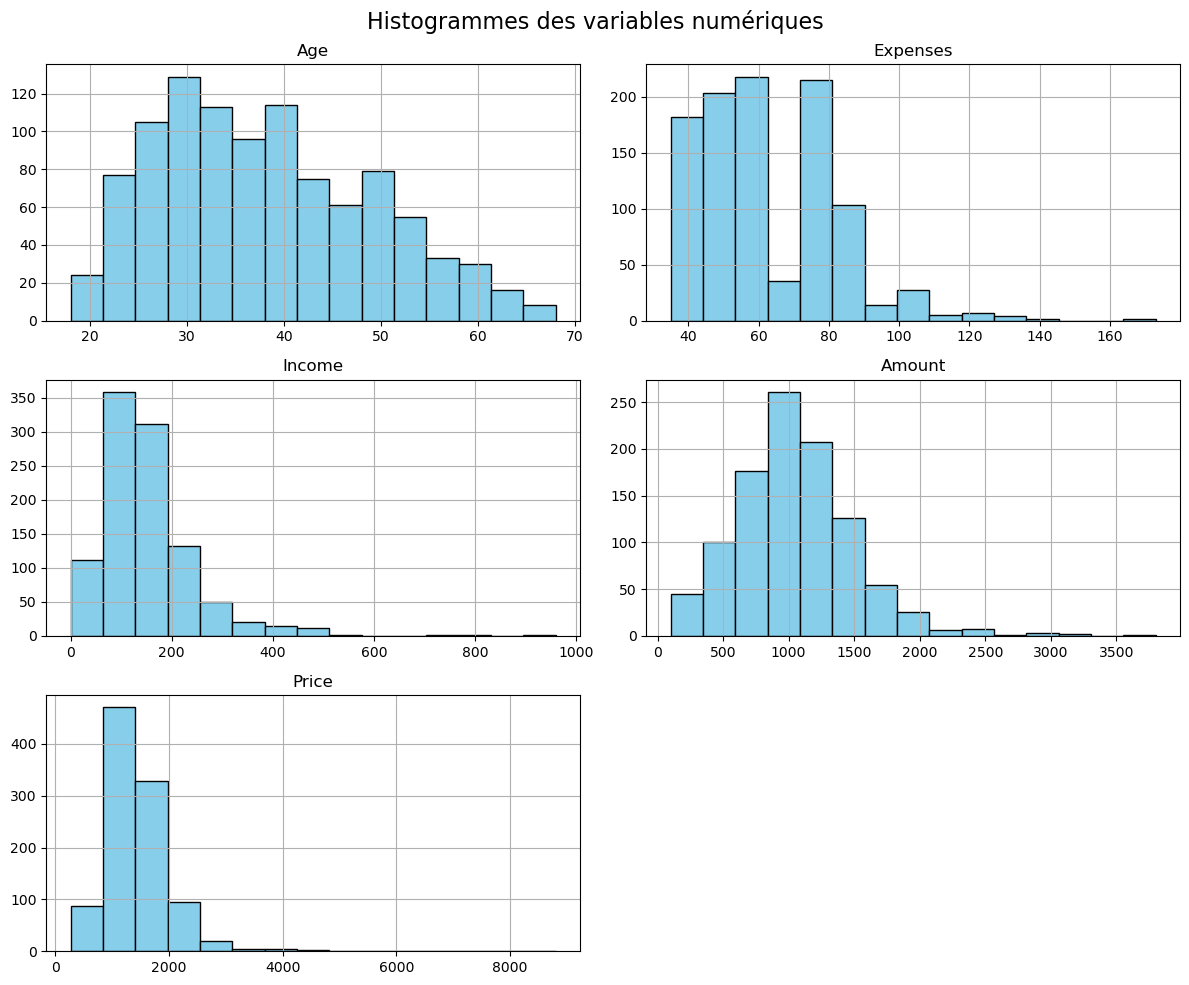

In [13]:
# Histogrammes pour toutes les variables numériques
df.hist(figsize=(12, 10), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Histogrammes des variables numériques', fontsize=16)
plt.tight_layout()
plt.show()


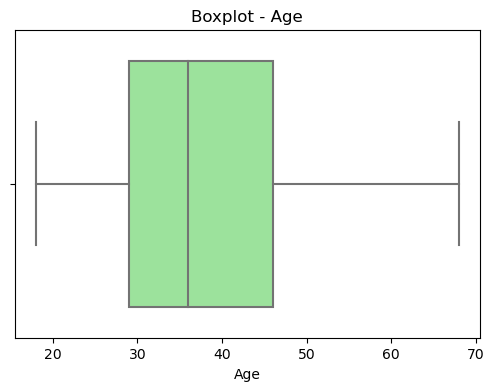

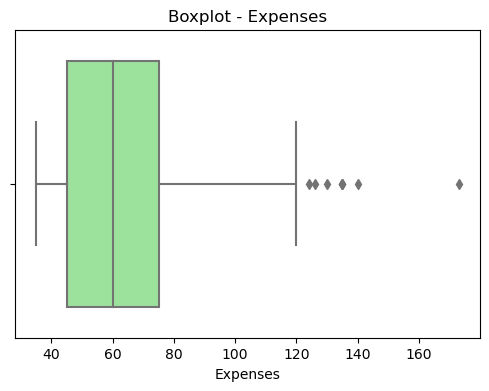

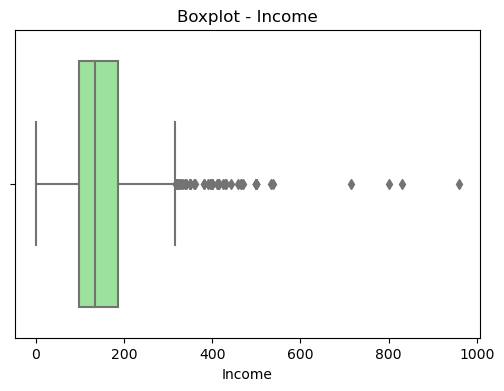

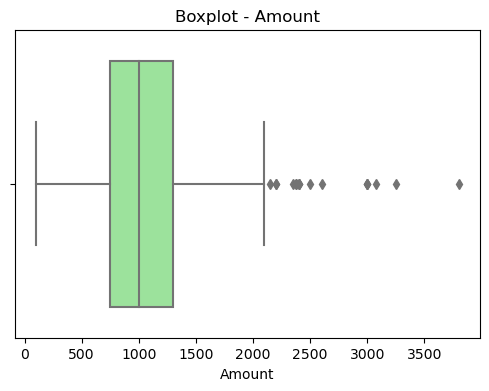

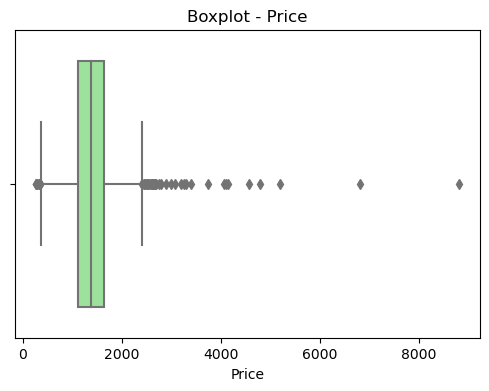

In [14]:
# Boxplots pour toutes les variables numériques
for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot - {col}')
    plt.xlabel(col)
    plt.show()


In [15]:
def detecter_outliers(df, colonne):
    Q1 = df[colonne].quantile(0.25)
    Q3 = df[colonne].quantile(0.75)
    IQR = Q3 - Q1
    seuil_bas = Q1 - 1.5 * IQR
    seuil_haut = Q3 + 1.5 * IQR
    outliers = df[(df[colonne] < seuil_bas) | (df[colonne] > seuil_haut)]
    return outliers

# Exemple pour la colonne "Revenu"
outliers_revenu = detecter_outliers(df, "Income")
#print("Clients avec revenu aberrant :\n", outliers_revenu)

In [16]:
# Compilation de tous les outliers (toutes variables numériques)
variables_numeriques = ['Age', 'Expenses', 'Income', 'Amount', 'Price']  # À adapter
clients_aberrants = pd.DataFrame()

for col in variables_numeriques:
    outliers = detecter_outliers(df, col)
    clients_aberrants = pd.concat([clients_aberrants, outliers])

# Suppression des doublons (un client peut être aberrant sur plusieurs variables)
clients_aberrants = clients_aberrants.drop_duplicates()
print("Nombre total de clients aberrants :", len(clients_aberrants))

Nombre total de clients aberrants : 105


##### Nous conservons les valeurs aberrantes (10,6% des données) car elles reflètent des cas réels importants (clients aisés, situations atypiques).

#### 3.1. Matrices de corrélation 

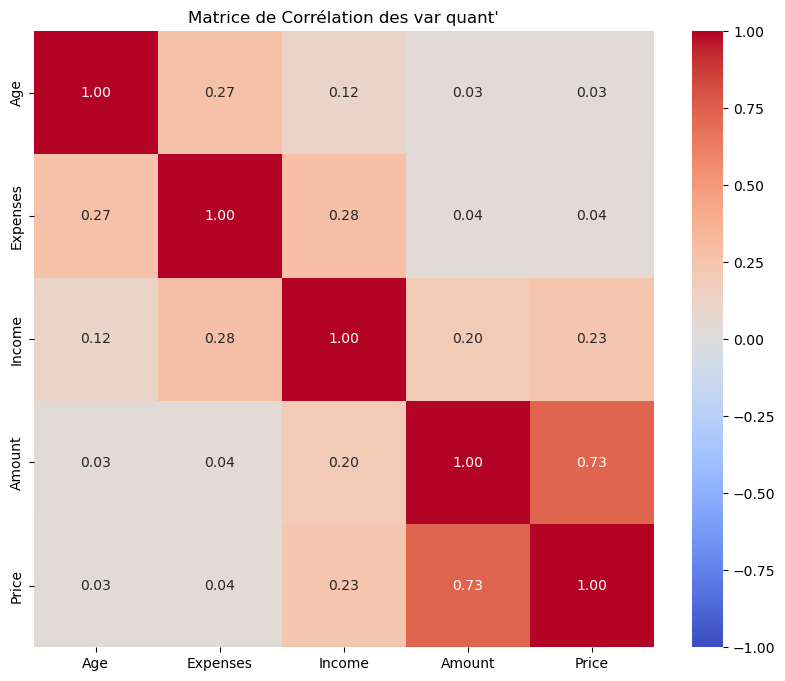

In [20]:
# Calcul des corrélations incluant la variable cible 'Statut1' et les autres variables
corr_matrix = df.corr(numeric_only=True)

# Heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Matrice de Corrélation des var quant'")
plt.show()

In [21]:
from scipy.stats import ttest_ind

# Exemple pour 'Revenu' vs. Statut
groupe_solvable = df[df['Statut1'] == 0]['Income']
groupe_non_solvable = df[df['Statut1'] == 1]['Income']

t_stat, p_value = ttest_ind(groupe_solvable, groupe_non_solvable)
print(f"Revenu : t = {t_stat:.2f}, p-value = {p_value:.4f}")

Revenu : t = 6.53, p-value = 0.0000


In [22]:
from scipy.stats import chi2_contingency

# Exemple pour 'Statut_marital'
table_contingence = pd.crosstab(df['Statut1'], df['Statut1'])
chi2, p, dof, _ = chi2_contingency(table_contingence)
print(f"Chi² : {chi2:.2f}, p-value = {p:.4f}")

Chi² : 1009.92, p-value = 0.0000


C:\Users\SAM\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


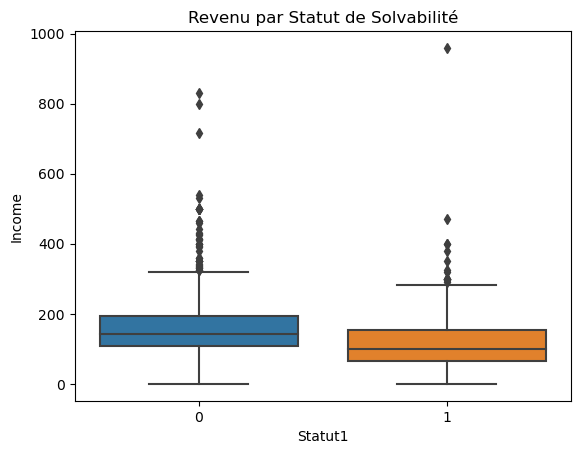

In [23]:
sns.boxplot(x='Statut1', y='Income', data=df)
plt.title("Revenu par Statut de Solvabilité")
plt.show()

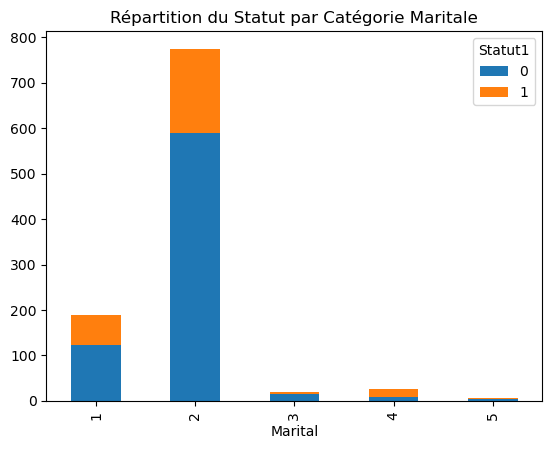

In [24]:
pd.crosstab(df['Marital'], df['Statut1']).plot(kind='bar', stacked=True)
plt.title("Répartition du Statut par Catégorie Maritale")
plt.show()

In [25]:
import statsmodels.api as sm

X = df[['Income', 'Age', 'Marital']]  # Variables explicatives
X = sm.add_constant(X)  # Ajout d'une constante
y = df['Statut1']

model = sm.Logit(y, X).fit()
print(model.summary())  # Affiche les coefficients et p-values

Optimization terminated successfully.
         Current function value: 0.551192
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Statut1   No. Observations:                 1015
Model:                          Logit   Df Residuals:                     1011
Method:                           MLE   Df Model:                            3
Date:                Tue, 08 Apr 2025   Pseudo R-squ.:                 0.05330
Time:                        23:32:22   Log-Likelihood:                -559.46
converged:                       True   LL-Null:                       -590.96
Covariance Type:            nonrobust   LLR p-value:                 1.342e-13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2275      0.323      0.705      0.481      -0.405       0.860
Income        -0.0065      0.

In [26]:
from scipy.stats import f_oneway

# Séparation des groupes
groupe_solvable = df[df['Statut1'] == 0]['Income']
groupe_non_solvable = df[df['Statut1'] == 1]['Income']

# ANOVA
f_stat, p_value = f_oneway(groupe_solvable, groupe_non_solvable)
print(f"ANOVA pour Revenu : F = {f_stat:.2f}, p-value = {p_value:.4f}")

ANOVA pour Revenu : F = 42.60, p-value = 0.0000


In [27]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Exemple : Comparaison du Revenu entre statuts maritaux
tukey = pairwise_tukeyhsd(endog=df['Income'], groups=df['Marital'], alpha=0.05)
print(tukey.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     1      2  38.1638    0.0  16.7195   59.608   True
     1      3   0.5105    1.0 -63.2268  64.2479  False
     1      4  -7.4053 0.9964 -63.7622  48.9516  False
     1      5 124.0281 0.0178  14.1907 233.8655   True
     2      3 -37.6532 0.4513 -99.1649  23.8584  False
     2      4  -45.569 0.1414 -99.3959   8.2578  False
     2      5  85.8643 0.1954 -22.6966 194.4253  False
     3      4  -7.9158 0.9989 -88.5379  72.7063  False
     3      5 123.5175 0.0516  -0.5311 247.5662  False
     4      5 131.4333 0.0244  11.0102 251.8564   True
------------------------------------------------------


C:\Users\SAM\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


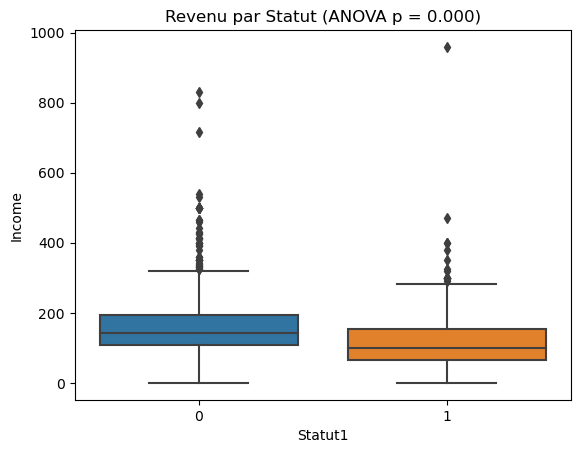

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot
sns.boxplot(x='Statut1', y='Income', data=df)
plt.title(f"Revenu par Statut (ANOVA p = {p_value:.3f})")  # Ajout de la p-value
plt.show()

In [29]:
# ANOVA pour une variable numérique
f_stat, p_value = f_oneway(
    df[df['Statut1'] == 0]['Income'],
    df[df['Statut1'] == 1]['Income']
)
print(f"ANOVA Revenu vs. Statut : p = {p_value:.3f}")

ANOVA Revenu vs. Statut : p = 0.000


In [30]:
from scipy.stats import tukey_hsd
result = tukey_hsd(*[df[df['Marital'] == cat]['Income'] for cat in df['Marital'].unique()])
print(result)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     37.653     0.451   -23.858    99.165
 (0 - 2)     38.164     0.000    16.720    59.608
 (0 - 3)     45.569     0.141    -8.258    99.396
 (0 - 4)    -85.864     0.195  -194.425    22.697
 (1 - 0)    -37.653     0.451   -99.165    23.858
 (1 - 2)      0.511     1.000   -63.227    64.248
 (1 - 3)      7.916     0.999   -72.706    88.538
 (1 - 4)   -123.518     0.052  -247.566     0.531
 (2 - 0)    -38.164     0.000   -59.608   -16.720
 (2 - 1)     -0.511     1.000   -64.248    63.227
 (2 - 3)      7.405     0.996   -48.952    63.762
 (2 - 4)   -124.028     0.018  -233.865   -14.191
 (3 - 0)    -45.569     0.141   -99.396     8.258
 (3 - 1)     -7.916     0.999   -88.538    72.706
 (3 - 2)     -7.405     0.996   -63.762    48.952
 (3 - 4)   -131.433     0.024  -251.856   -11.010
 (4 - 0)     85.864     0.195   -22.697   194.425
 (4 - 1)    123.518     0.052   

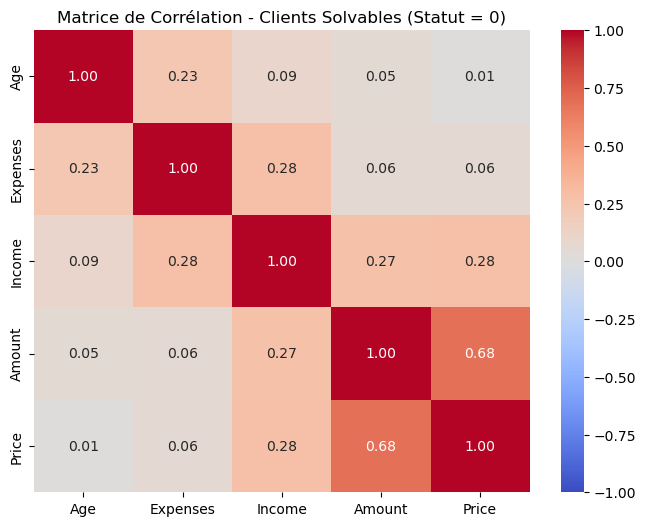

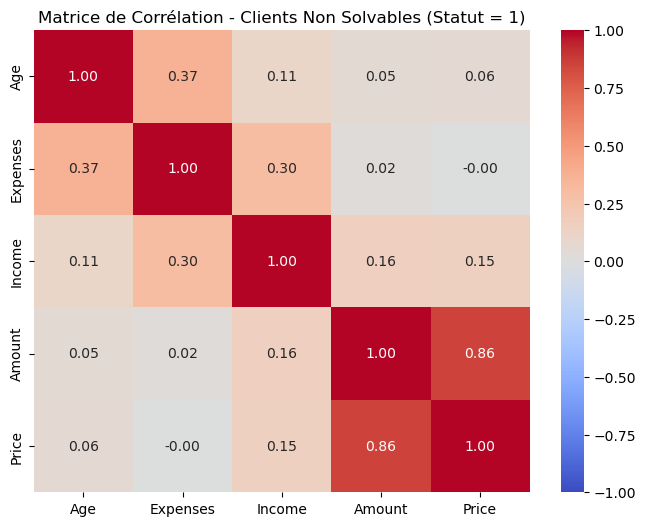

In [31]:
# Calcul des matrices de corrélation pour chaque groupe
corr_solvable = df[df['Statut1'] == 0].corr(numeric_only=True)
corr_non_solvable = df[df['Statut1'] == 1].corr(numeric_only=True)

# Création de la première heatmap pour les clients solvables (Statut = 0)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_solvable, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Matrice de Corrélation - Clients Solvables (Statut = 0)")
plt.show()

# Création de la deuxième heatmap pour les clients non solvables (Statut = 1)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_non_solvable, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Matrice de Corrélation - Clients Non Solvables (Statut = 1)")
plt.show()

#### 3.2. Analyse de variance (ANOVA) entre Statut et les variables numériques

In [37]:
import scipy.stats as stats

# ANOVA entre Statut (catégorielle) et chaque variable numérique
print("Résultats de l'ANOVA :")
for col in df.select_dtypes(include='number').columns:
    if col != 'Statut':
        groupe_0 = df[df['Statut1'] == 0][col]
        groupe_1 = df[df['Statut1'] == 1][col]
        f_stat, p_val = stats.f_oneway(groupe_0, groupe_1)
        print(f"{col} : F = {f_stat:.2f}, p = {p_val:.4f}")


Résultats de l'ANOVA :
Age : F = 11.09, p = 0.0009
Expenses : F = 0.04, p = 0.8329
Income : F = 42.60, p = 0.0000
Amount : F = 22.23, p = 0.0000
Price : F = 0.02, p = 0.8836


D'après les résultats de l'ANOVA, les variables qui ont un impact significatif sur le statut de solvabilité sont : Age, Income, Amount

#### 3.3. Test du Chi² (variables qualitatives vs Statut)

In [39]:
from scipy.stats import chi2_contingency

# Exemple : Statut vs Marital
contingency = pd.crosstab(df['Marital'], df['Statut1'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Test du Chi² entre Marital et Statut : chi² = {chi2:.2f}, p = {p:.4f}")


Test du Chi² entre Marital et Statut : chi² = 29.87, p = 0.0000


#### 3.4. Visualisations

C:\Users\SAM\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


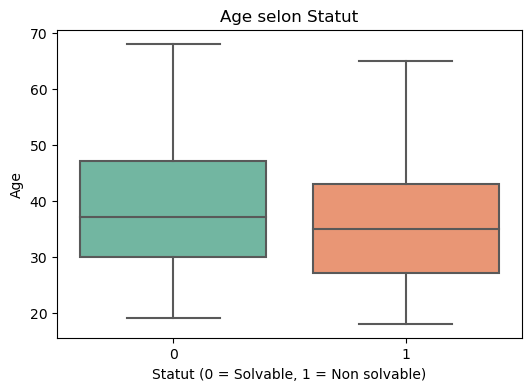

C:\Users\SAM\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


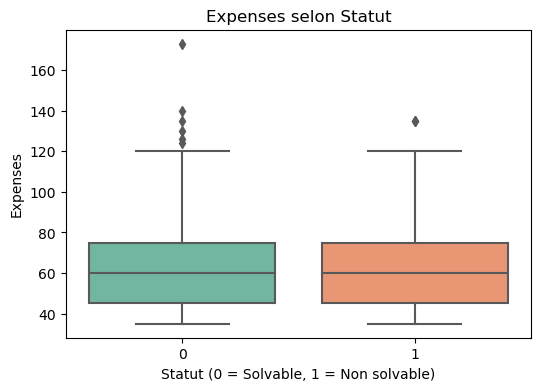

C:\Users\SAM\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


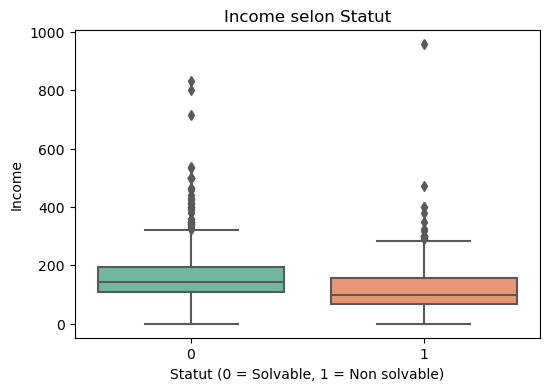

C:\Users\SAM\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


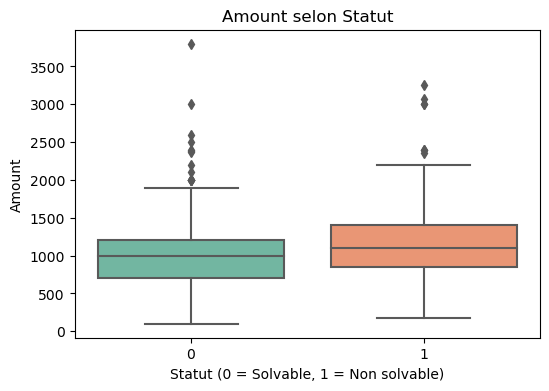

C:\Users\SAM\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


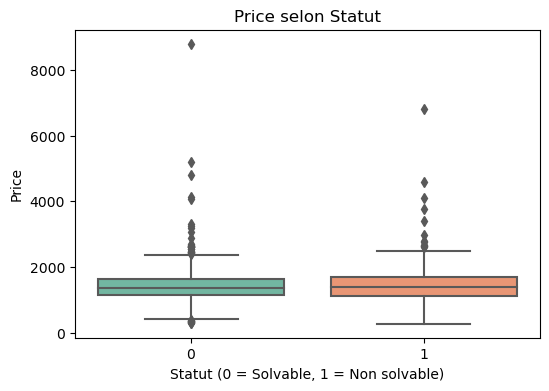

In [41]:
for col in df.select_dtypes(include='number').columns:
    if col != 'Statut1':
        plt.figure(figsize=(6, 4))
        sns.boxplot(x='Statut1', y=col, data=df, palette='Set2')
        plt.title(f'{col} selon Statut')
        plt.xlabel('Statut (0 = Solvable, 1 = Non solvable)')
        plt.ylabel(col)
        plt.show()


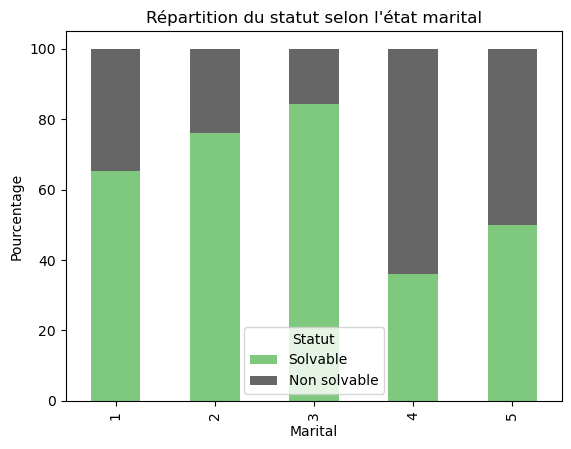

In [43]:
# Pourcentage des statuts par catégorie de Marital
marital_statut = pd.crosstab(df['Marital'], df['Statut1'], normalize='index') * 100
marital_statut.plot(kind='bar', stacked=True, colormap='Accent')
plt.title("Répartition du statut selon l'état marital")
plt.ylabel("Pourcentage")
plt.xlabel("Marital")
plt.legend(["Solvable", "Non solvable"], title="Statut")
plt.show()


### 4. Préparation pour la modélisation

In [45]:
# Séparation de la variable cible 'Statut' et des variables explicatives
X = df.drop(columns=['Statut1'])  
y = df['Statut1']  


In [47]:
from sklearn.model_selection import train_test_split

# Séparation des données en train (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
from sklearn.preprocessing import StandardScaler

# Création de l'objet StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Ajustement et transformation des données d'entraînement
X_train_scaled = scaler.fit_transform(X_train)

# Transformation des données de test (en utilisant les paramètres appris sur l'entraînement)
X_test_scaled = scaler.transform(X_test)


### 5. Modélisation et évaluation 

In [51]:
from sklearn.linear_model import LogisticRegression

# Création et entraînement du modèle
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)


LogisticRegression()

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Prédictions
y_pred = logreg.predict(X_test_scaled)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", cm)

# Accuracy, Précision, Recall, F1-score
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Précision :", precision_score(y_test, y_pred))
print("Recall :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))


Matrice de confusion :
 [[150   2]
 [ 40  11]]
Accuracy : 0.7931034482758621
Précision : 0.8461538461538461
Recall : 0.21568627450980393
F1-score : 0.34375000000000006


- 150 : bien classés solvables (Vrais Négatifs)
- 11 : bien classés non solvables (Vrais Positifs)
- 2 : faux positifs
- 40 : faux négatifs
- Accuracy	0.79 (≈ 79%)	Le modèle est globalement correct dans 79% des cas.
- Précision	0.85	Sur toutes les prédictions "Non solvable", 85% étaient correctes.
- Recall	0.22	Le modèle ne détecte que 22% des vrais "Non solvables" ➤ sous-détection.
- F1-score	0.34	Moyenne entre précision et recall ➤ assez faible.

##### Conclusion : 
Le modèle détecte bien les clients solvables, mais il sous-estime fortement les non solvables, comme le montre le faible recall.

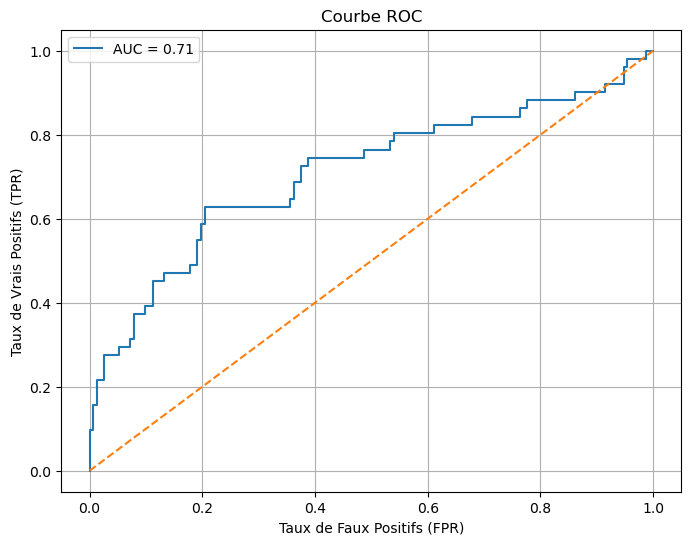

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilités pour la classe positive
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Affichage
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC")
plt.legend()
plt.grid()
plt.show()


In [57]:
from sklearn.model_selection import cross_val_score

# Évaluation par validation croisée (k=5 par exemple)
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')

print("Scores de validation croisée (Accuracy) :", cv_scores)
print("Moyenne des scores :", cv_scores.mean())


Scores de validation croisée (Accuracy) : [0.77832512 0.7635468  0.71921182 0.74876847 0.7635468 ]
Moyenne des scores : 0.7546798029556651


C:\Users\SAM\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Définir les valeurs à tester pour k
param_grid = {'n_neighbors': list(range(1, 21))}

# Création du modèle KNN
knn = KNeighborsClassifier()

# GridSearch avec validation croisée (5 folds)
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

# Meilleur modèle
best_knn = grid.best_estimator_
print("Meilleur k :", grid.best_params_['n_neighbors'])


Meilleur k : 2


Matrice de confusion :
 [[142  10]
 [ 46   5]]
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       152
           1       0.33      0.10      0.15        51

    accuracy                           0.72       203
   macro avg       0.54      0.52      0.49       203
weighted avg       0.65      0.72      0.66       203

AUC : 0.5935242518059856


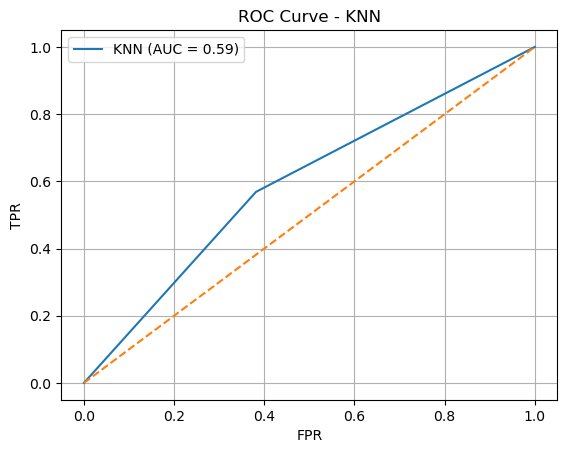

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Prédictions
y_pred_knn = best_knn.predict(X_test_scaled)

# Matrice de confusion
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_knn))

# Rapport complet
print(classification_report(y_test, y_pred_knn))

# ROC / AUC
y_proba_knn = best_knn.predict_proba(X_test_scaled)[:, 1]
auc_knn = roc_auc_score(y_test, y_proba_knn)
print("AUC :", auc_knn)

# Tracer la courbe ROC
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_proba_knn)
plt.figure()
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve - KNN')
plt.legend()
plt.grid()
plt.show()


In [63]:
from sklearn.model_selection import cross_val_score

# Nested CV : GridSearch à l'intérieur de chaque split
nested_scores = cross_val_score(grid, X_scaled, y, cv=5, scoring='accuracy')
print("Scores nested CV :", nested_scores)
print("Moyenne nested CV :", nested_scores.mean())


Scores nested CV : [0.76847291 0.73891626 0.75369458 0.73891626 0.75369458]
Moyenne nested CV : 0.7507389162561576


### 7. Sauvegarde et réutilisation des modèles

In [64]:
import joblib

# Sauvegarder le modèle de régression logistique
joblib.dump(logreg, 'modele_logistique.joblib')

# Sauvegarder le modèle KNN
joblib.dump(best_knn, 'modele_knn.joblib')

# Sauvegarder aussi le scaler utilisé pour les données
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']

In [65]:
# Charger les modèles
logreg_loaded = joblib.load('modele_logistique.joblib')
knn_loaded = joblib.load('modele_knn.joblib')
scaler_loaded = joblib.load('scaler.joblib')


In [66]:
# Exemple de nouveaux clients 
nouveaux_clients = pd.DataFrame({
    'Age': [45,26],
    'Marital': [1,3],
    'Expenses': [100,90],
    'Income': [200,150],
    'Amount': [800,650],
    'Price': [1000,1600]
})

# Standardiser comme avant
nouveaux_clients_scaled = scaler_loaded.transform(nouveaux_clients)

# Prédire avec le modèle chargé
statut_logreg = logreg_loaded.predict(nouveaux_clients_scaled)
statut_knn = knn_loaded.predict(nouveaux_clients_scaled)

print("Prédiction Logistique :", statut_logreg)
print("Prédiction KNN :", statut_knn)


Prédiction Logistique : [0 0]
Prédiction KNN : [0 0]


### 8. Développement d'une application interactive 

Les modèles enregistrés sont : modele_logistique.joblib et modele_knn.joblib.